<a href="https://colab.research.google.com/github/tiagogoto/mecanica-refrigeracao/blob/main/Cengel_11_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício do livro Cengel 11-66


<p align="justify">Considere um ciclo de refrigeração em cascata de dois estágios com uma câmara de flash (separador de líquido), como mostra-do na figura; ele utiliza o refrigerante-134a como fluido de trabalho. A temperatura do evaporador é de -10 °C, e a pressão do condensador é de 1.600 kPa. O refrigerante sai do condensador como líquido saturado e é estrangulado até um separador de líquido que opera a 0,45 MPa. Parte do refrigerante evapora durante esse processo de separação, e o vapor resultante é misturado ao refrigerante que sai do compressor de baixa pressão. A mistura é então comprimida até a pressão do condensador pelo compressor de alta pressão. O líquido do separador de líquido é estrangulado até a pressão do evaporador e resfria o espaço refrigerado à medida que é vaporizado no evaporador. A vazão mássica do refrigerante através do compressor de baixa pressão é de 0,11 kg/s. Considerando que o refrigerante sai do evaporador como vapor saturado e uma eficiência isentrópica de 86% para ambos os compressores, determine (a) a vazão mássica do refrigerante através do compressor de alta pressão, (b) a taxa da refrigeração fornecida pelo sistema e (c) o COP desse refrigerador. Determine também (d) a taxa da refrigeração e o COP, considerando agora que esse refrigerador é operado em um ciclo por compressão de vapor de estágio único entre a mesma temperatura de evaporação e pressão do condensador com a mesma eficiência do compressor e o mesmo fluxo calculado no item (a).
</p>




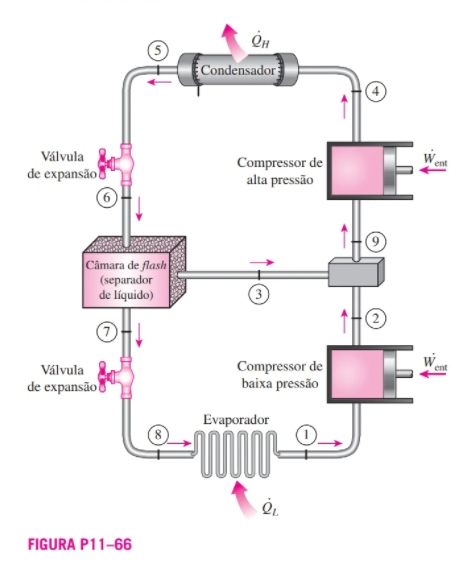

## Instalando a biblioteca CoolProp

In [20]:
!pip install coolprop

## importanção da biblioteca CoolProp

In [21]:
from CoolProp.CoolProp import PropsSI

## Dados fornecidos pelo exercício

Observação: Temperatura fornecida na unidade em kelvin e pressão em Pascal

In [22]:
# Ponto 1
T1 = -10 + 273.15 #K
x1 = 1
P1 = PropsSI('P', 'T', T1, 'Q', x1, 'R134a')
print("P1 = ", P1/1000, "kPa" )

# Ponto 2
P2 = 450000 #Pa

#Ponto 3
x3 = 1 # título, vapor saturado
P3 = P2

# Ponto 4
P4 = 1600000 #Pa

#Ponto 5
x5 = 0
P5 = P4

# Ponto 6
P6 = 450000 #Pa

# Ponto 7
x7 = 0 # título líquido saturado
P7 = P6

# Ponto 8
P8 = P1


m1 = 0.11 #kg/s
eta = 0.86

P1 =  200.6033074727022 kPa


# Solução do exercício



## Encontrando a relação de massa no separador

No câmara de flash, ocorre a separação entre o líquido saturado e vapor saturado e no exercício é fornecido a vazão mássica de fluido refrigerante no compressor de baixa pressão, ou seja $\dot{m}_7  = \dot{m}_1 = 0,11 \,\, kg/s $.


Lembrando da definição do título $x = \frac{m_{vapor}}{m}$, temos que $\dot{m}_7 = \dot{m}_6 (x_6 - 1 )$ e $\dot{m}_3 = \dot{m}_6 x_6$, portanto temos:

$$ \dot{m}_6 =  \frac{\dot{m}_7}{(1 - x)} $$

In [23]:
#Ponto 5  a gente tem P5 e x5 = 0

h5 = PropsSI('H', 'P', P5, 'Q', x5, 'R134a')
print("h5 = ", h5/1000, "kJ/kg")

# Processo iosoentálpico na válvula de expansão
h6 = h5

# temos a pressão do ponto 6
x6 = PropsSI('Q','H', h6, 'P', P6, 'R134a' )
print("x6 = ", x6)


# calculamos a massa 6
m6 = m1/(1-x6)
print("m6 = ", m6, "kg/s")

#Determinando a vazão mássica do ponto 3
m3 = m6*x6
print("m3 = ", m3, "kg/s")

h5 =  284.11435080149863 kJ/kg
x6 =  0.35572713157215596
m6 =  0.1707351114573895 kg/s
m3 =  0.06073511145738951 kg/s


#### Cálculo da taxa de refrigeração no evaporador:

$$\dot{Q}_L = \dot{m}_{1} (h_1 - h_8) $$

Lembrando que $h_8 = h_7$, devido ao processo isoentálpico na válvula de expansão.

In [24]:
# ponto 7, sabemos que x7 = 0 e P7 = P3

h7 = PropsSI('H', 'Q', x7, 'P', P7, 'R134a')
print("h7 =", h7/1000, "kJ/kg")

h8 = h7
fluido = 'R134a'
#Ponto 1

h1 = PropsSI('H', 'T', T1, 'Q', x1, fluido)

# Calcular a capcidade
Q_L = m1 * (h1 - h8)
print("Q_L = ", Q_L/1000, "kW")

h7 = 216.98668647539768 kJ/kg
Q_L =  19.324604980170943 kW


### Cálculo do COP do ciclo de refrigeração

Sabemos que o COP é determinado por:
$$ COP = \frac{\dot{Q}_L}{\dot{W}_c}$$

o $\dot{W}_c$ é a soma da potência do compressor de baixa pressão e alta pressão. Que podemos determinar por:
$$ \dot{W}_c =  \dot{W}_1 + \dot{W}_2$$

e que:
$$ \dot{W}_1 = \dot{m}_1 *  (h_2 - h_1) $$
e
$$ \dot{W}_2 = \dot{m}_6 *  (h_4 - h_9)$$

Antes devemos encontrar as entalpias, lembrando para um caso de compressão isoentrópico, $s_{2s} = s_1 $

In [25]:
# entropia do ponto 1
s1 = PropsSI('S', 'T', T1, 'Q', x1, fluido)

# ponto 2
# Processo isoentrópico
s2s = s1
print("s2s = ", s2s/1000, "kJ/kgK")

# determinando a entalpia h2s, para o ponto 2 ideal
h2s = PropsSI('H', 'P', P2, 'S', s2s, 'R134a')
print("h2s = ", h2s/1000, "kJ/kg")



s2s =  1.7333507972613447 kJ/kgK
h2s =  409.2331246949242 kJ/kg


#### Para determinar  a entalpia real do ponto 2, utilizamos a eficiência isoentrópica, definido por:
$$ \eta_{iso } = \frac{\dot{W}_{ideal}}{\dot{W}_{real}} = \frac{h_{2s} - h_1}{h_2 - h_1}$$
Portanto temos:
$$ h_2 =  \frac{h_{2s} -  h_1}{\eta_{iso}} + h_1 $$

In [26]:
h2 = (h2s -h1)/eta + h1
print("h2 = ", h2/1000, "kJ/kg")


h2 =  411.93027534351586 kJ/kg


#### Cálculo da potência do compressor de baixa pressão
$$ \dot{W}_1 = \dot{m}_1 *  (h_2 - h_1) $$


In [27]:
w1 = m1 * (h2 -h1 )
print("w1 =", w1/1000, "kW")

w1 = 2.119189795322057 kW


####  Cálculo da potência do compressor de alta pressão
Para determinar o estado no ponto 9 (após trocador de calor direto), devemos realizar um balanço de energia, conforme:

$$\dot{m}_3 h_3 + \dot{m}_2 h_2 - \dot{m}_9 h_9  = 0 $$

<br>
<br>

Lembrando que $\dot{m}_2 = \dot{m}_1 = \dot{m}_7 $ e $\dot{m}_9 = \dot{m}_6 = \dot{m}_7 + \dot{m}_3 $

##### Após o balanço de energia no trocador de calor direto temos:

$$ h_9 = \frac{\dot{m}_3 h_3 + \dot{m}_2 h_2}{\dot{m}_9}$$

In [28]:
#Ponto 3  P3 = P6 e x3 = 1 - vapor saturado
h3 = PropsSI('H', 'P', P3, 'Q', x3, fluido)
print("h3 =", h3/1000, "kJ/kg")

m9 = m6
m2 = m1
P9 = P3
#determinando a entalpia do ponto 9
h9 = (m3 * h3 + m2*h2)/m9
print("h9 = ", h9/1000, "kJ/kg")

#determinado a entropia do ponto 9
s9 = PropsSI('S', 'H', h9, 'P', P9, fluido)
print("s9 =", s9/1000, "kJ/kgK")

# Para uma compressão isoentrópica temos:
s4s = s9
print("s4s = s9 = ", s9/1000, "kJ/kg.K")

h3 = 405.69218113200844 kJ/kg
h9 =  409.71121598317944 kJ/kg
s9 = 1.7350016998085416 kJ/kgK
s4s = s9 =  1.7350016998085416 kJ/kg.K


Para determinar a entalpia real do ponto 4, $h_4$, utilizamos o mesmo conceito de eficiência isoentrópica, e obtemos:

$$ h_4 = \frac{h_{4s} - h_9}{\eta_{iso}} +  h_9 $$



In [29]:
h4s = PropsSI('H', 'S', s4s, 'P', P4, fluido)
print("h4s =", h4s/1000, "kJ/kg")
h4 = (h4s - h9)/eta + h9
print("h4 =", h4/1000, "kJ/kg")

h4s = 436.57836744350914 kJ/kg
h4 = 440.95208977426046 kJ/kg


### Calculando a potência do compressor de alta pressão

$$ \dot{W}_2 = \dot{m}_6 *  (h_4 - h_9)$$

In [30]:
w2 = m9 * (h4 - h9)
print("w2 = ",w2/1000,"kW")
print("Wc = ", (w1 + w2)/1000, "kW")

w2 =  5.333914068746456 kW
Wc =  7.453103864068513 kW


### Determinando o COP

In [31]:
COP = Q_L/(w1 + w2)

print("COP = ", COP)

COP =  2.592826469698759


## Solução letra (d)

Considerando um ciclod e refrigeração de apenas um estágio com as mesmas temperaturas e pressão.

### Dados fornecido

$T_{d1} =  T_1 = - 10^∘C$

$x_{d1} = 1$

$P_{d2} = 1600 \, kPa$

$\eta_{dc} = 0.86$

Dados do ciclo:

In [32]:
# Ponto 1
Td1 = -10 + 273.15 # em K
xd1 = 1

# Ponto 2
Pd2 = 1600*10**3 #Pa

eta_dc = 0.86


### Propriedades termodinâmica dos pontos

In [34]:
# Ponto 1

hd1 = PropsSI('H', 'T', Td1, 'Q', xd1, 'R134a')
print("hd1 = ", hd1/1000, "kJ/kg")
sd1 = PropsSI('S', 'T', Td1, 'Q', xd1, 'R134a')
print("sd1 = ", sd1/1000, "kJ/kg.K")

hd1 =  392.66491356786076 kJ/kg
sd1 =  1.7333507972613447 kJ/kg.K



Considerando um processo de compressão isoentrópico, $s_{d2s} = s_{d1}$. E cutilizando a eficiência isoentrópica temos:

$$ h_{d2} =  \frac{h_{d2s} -  h_{d1}}{\eta_{dc}} + h_{d1} $$



In [35]:
sd2s = sd1

hd2s = PropsSI('H', 'P', Pd2, 'S', sd2s, 'R134a')
print("hd2s = ", hd2s/1000, "kJ/kg")

hd2 = (hd2s - hd1)/eta_dc + hd1
print("hd2 = ", hd2/1000, "kJ/kg")

hd2s =  436.0187228931757 kJ/kg
hd2 =  443.0763197600875 kJ/kg


Propriedades termodinâmica do ponto 3 (líquido saturado após saída do condensador) e ponto 4 (após a válvula de expansão)


In [38]:
Pd3 = Pd2
hd3 = PropsSI('H', 'P', Pd3, 'Q', 0, 'R134a')
print("hd3 = ", hd3/1000, "kJ/kg")

hd4 = hd3
print("hd4 = ", hd4/1000, "kJ/kg")

hd3 =  284.11435080149863 kJ/kg
hd4 =  284.11435080149863 kJ/kg


### Cálculo da capcidade de refrigeração

$$ \dot{Q}_{L} = \dot{m}_r ( h_{d1} - h_{d4}) $$

lembrando que a vazão mássica é igual $\dot{m}_6$ do ciclo de 2 estágio

In [40]:
mr = m6

QdL = mr * (hd1 - hd4)
print("QdL = ", QdL/1000, "kW")

QdL =  18.5333924326772 kW


### Cálculo da potência do compressor

$$ \dot{w} = \dot{m}_r (h_{d2} - h_{d1}) $$

In [42]:
wdc = mr * (hd2 - hd1)
print("Wdc = ", wdc/1000, "kW")

Wdc =  8.60699705495356 kW


#### Cálculo do COP para o ciclo de 1 estágio

$$ COP = \frac{\dot{Q}_{L, d}}{\dot{W}_{c, d}} $$

In [43]:
COPd = QdL/wdc
print("COPd = ", COPd )

COPd =  2.153293688187186
